In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('df_final.csv')

## Conteo de tipo de genero

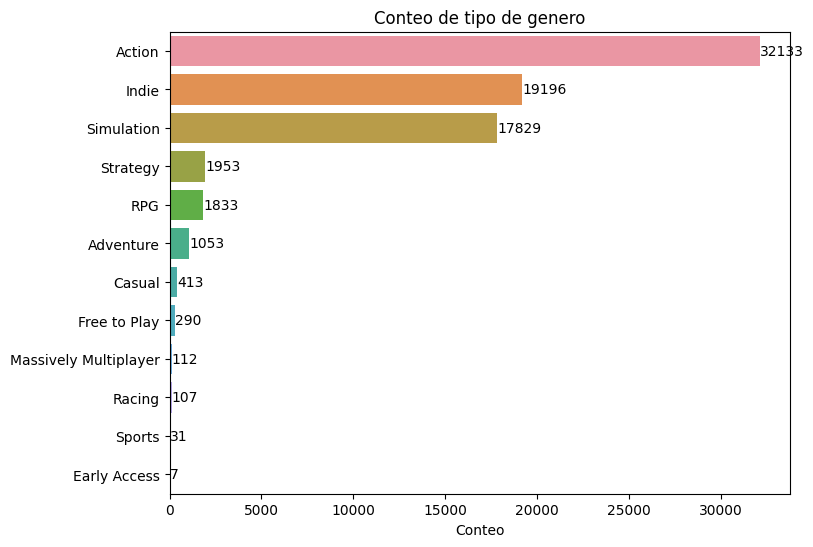

In [3]:
#ordenamos el conteo de generos por la cantidad de conteo
genres = ['Action', 'Adventure', 'Casual', 'Early Access', 'Free to Play', 'Indie', 'Massively Multiplayer', 'RPG', 'Racing', 'Simulation', 'Sports', 'Strategy']
genre_counts = df[genres].sum()
genre_counts_sorted = genre_counts.sort_values(ascending=False) #ordenamos
plt.figure(figsize=(8, 6))
sns.barplot(x=genre_counts_sorted, y=genre_counts_sorted.index)
for i, count in enumerate(genre_counts_sorted):
    plt.text(count, i, str(count), ha='left', va='center')
plt.xlabel('Conteo')
plt.title('Conteo de tipo de genero')
plt.show()

Gran mayoria de juegos del genero de Action

## Juegos mas adquiridos

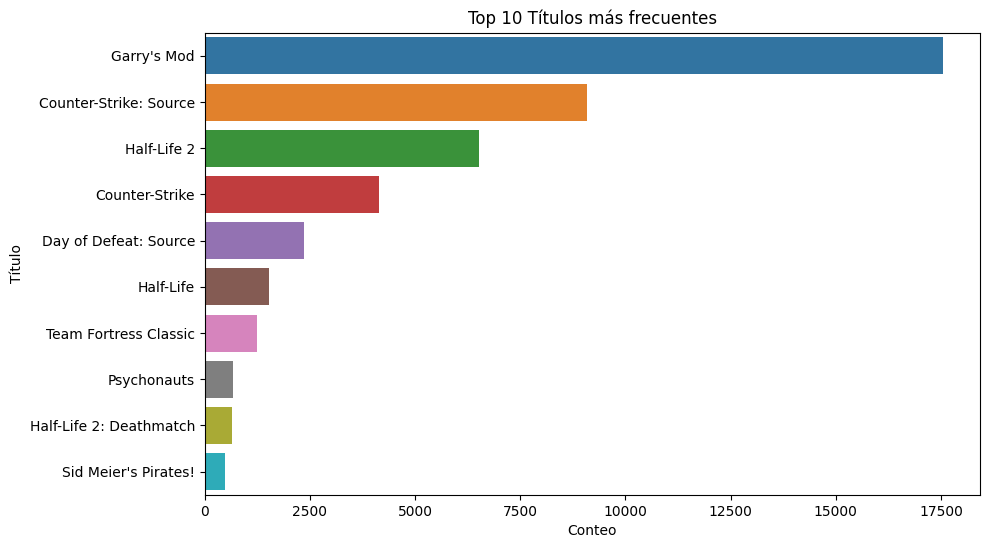

In [4]:
# 10 títulos más frecuentes por conteo de titulos
top_10_titles = df['title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_titles.values, y=top_10_titles.index)
plt.xlabel('Conteo')
plt.ylabel('Título')
plt.title('Top 10 Títulos más frecuentes')
plt.show()

## Tiempo jugado para cada año

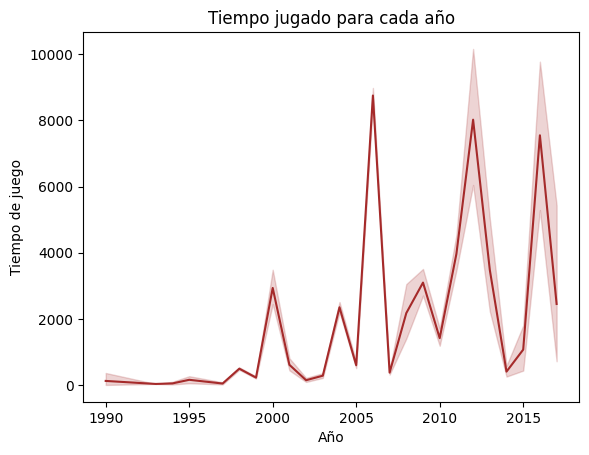

In [5]:
sns.lineplot(data=df, x='year', y='playtime_forever', color='brown')
plt.title('Tiempo jugado para cada año')
plt.xlabel('Año')
plt.ylabel('Tiempo de juego')
plt.show()

## Comparacion del sentiment_score

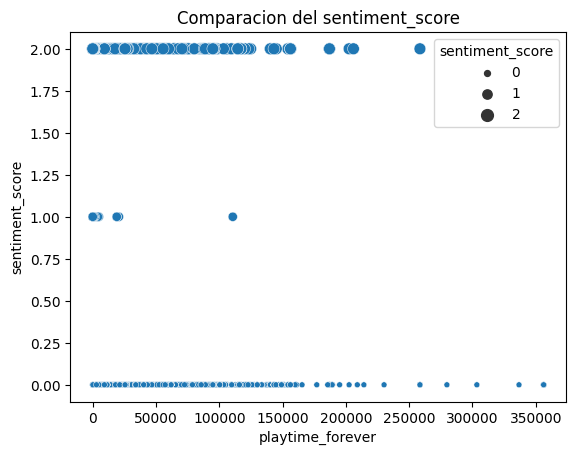

In [6]:
sns.scatterplot(data=df, x='playtime_forever', y='sentiment_score', size='sentiment_score')
plt.title('Comparacion del sentiment_score')
plt.show()

## Tiempo de juego por año

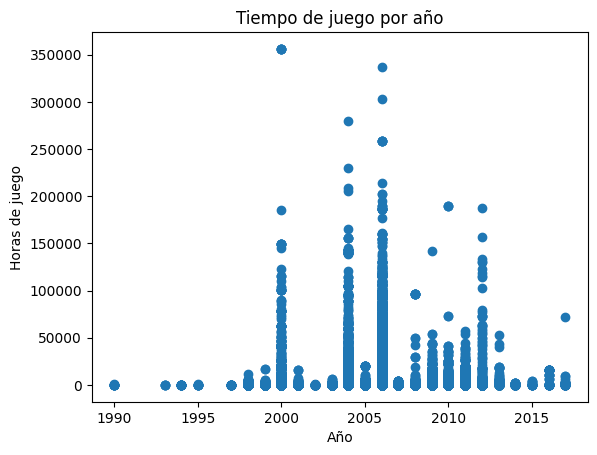

In [7]:
plt.scatter(df['year'], df['playtime_forever'])
plt.xlabel('Año')
plt.ylabel('Horas de juego')
plt.title('Tiempo de juego por año')
plt.show()

El año 2000 fue el que tuvo el pico registrado mas alto de horas de juego para un usuario

## Conteo de items por año

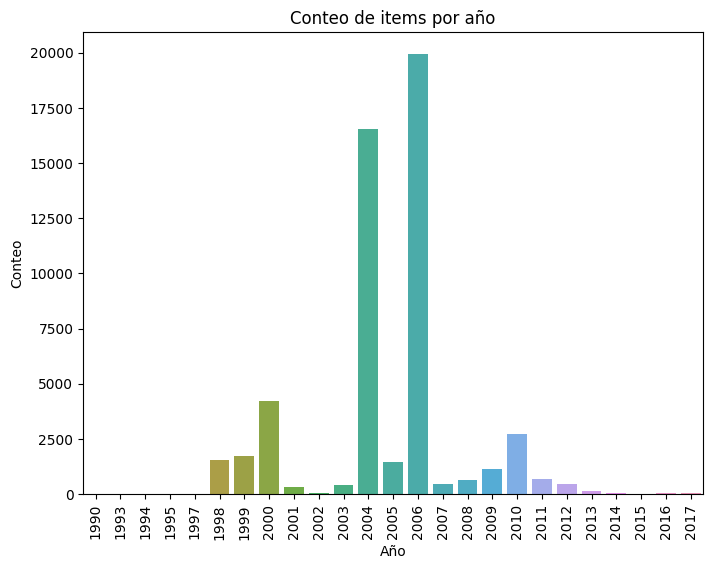

In [8]:
year_counts = df['year'].value_counts()
year_counts = year_counts[year_counts != 0]  # Exclude values equal to 0

plt.figure(figsize=(8, 6))  # Adjust the width and height of the plot as needed

# Create the bar plot using Seaborn
sns.barplot(x=year_counts.index, y=year_counts)
plt.title('Conteo de items por año')
plt.ylabel('Conteo')
plt.xlabel('Año')
plt.xticks(rotation=90)
plt.show()

podemos ver que los años con mas items en nuestra tabla final son el año 2004 y 2006

## Modelo ML

A continuacion planteare un modelo de machine learning que intente cumplir con los requisitos pedidos

In [9]:
from sklearn.metrics.pairwise        import cosine_similarity
from sklearn.metrics.pairwise        import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
muestra = df.head(4000)
tfidf = TfidfVectorizer(stop_words='english')
muestra=muestra.fillna("")

tdfid_matrix = tfidf.fit_transform(muestra['review'])
cosine_similarity = linear_kernel( tdfid_matrix, tdfid_matrix)


In [15]:
def recomendacion_juego(id_juego: int):
    if id_juego not in muestra['id'].values:
        return {'mensaje': 'No existe el id del juego.'}
    titulo = muestra.loc[muestra['id'] == id_juego, 'title'].iloc[0]
    idx = muestra[muestra['title'] == titulo].index[0]
    sim_cosine = list(enumerate(cosine_similarity[idx]))
    sim_scores = sorted(sim_cosine, key=lambda x: x[1], reverse=True)
    sim_ind = [i for i, _ in sim_scores[1:6]]
    sim_juegos = muestra['title'].iloc[sim_ind].values.tolist()
    return {'juegos recomendados': list(sim_juegos)}
print(recomendacion_juego(70))

{'juegos recomendados': ["Garry's Mod", 'Half-Life', 'Half-Life', 'The Ship: Murder Party', 'The Ship: Murder Party']}


In [16]:
def PlayTimeGenre(genre: str) -> dict:
    genre = genre.capitalize()
    genre_df = df[df[genre] == 1]
    year_playtime_df = genre_df.groupby('year')['playtime_forever'].sum().reset_index()
    max_playtime_year = year_playtime_df.loc[year_playtime_df['playtime_forever'].idxmax(), 'year']
    return {"Género": genre, "Año de lanzamiento con más horas jugadas para Género :": int(max_playtime_year)}

print(PlayTimeGenre('Action'))

{'Género': 'Action', 'Año de lanzamiento con más horas jugadas para Género :': 2004}


In [17]:
def UserForGenre(genre: str) -> dict:
    genre = genre.capitalize()
    genre_df = df[df[genre] == 1]
    max_playtime_user = genre_df.loc[genre_df['playtime_forever'].idxmax(), 'user_id']
    year_playtime_df = genre_df.groupby('year')['playtime_forever'].sum().reset_index()
    playtime_list = year_playtime_df.to_dict(orient='records')
    result = {
        "Usuario con más horas jugadas para Género " + genre: max_playtime_user,
        "Horas jugadas": playtime_list}
    return result

print(UserForGenre('Action'))

{'Usuario con más horas jugadas para Género Action': 'jiumohoo', 'Horas jugadas': [{'year': 1990, 'playtime_forever': 1120}, {'year': 1994, 'playtime_forever': 739}, {'year': 1995, 'playtime_forever': 1202}, {'year': 1997, 'playtime_forever': 29}, {'year': 1998, 'playtime_forever': 756721}, {'year': 1999, 'playtime_forever': 389716}, {'year': 2000, 'playtime_forever': 12463469}, {'year': 2001, 'playtime_forever': 29641}, {'year': 2002, 'playtime_forever': 5796}, {'year': 2003, 'playtime_forever': 69566}, {'year': 2004, 'playtime_forever': 38798438}, {'year': 2005, 'playtime_forever': 739196}, {'year': 2006, 'playtime_forever': 283713}, {'year': 2007, 'playtime_forever': 141148}, {'year': 2008, 'playtime_forever': 497125}, {'year': 2009, 'playtime_forever': 2838126}, {'year': 2010, 'playtime_forever': 3576182}, {'year': 2011, 'playtime_forever': 2743719}, {'year': 2012, 'playtime_forever': 3291542}, {'year': 2013, 'playtime_forever': 308284}, {'year': 2014, 'playtime_forever': 18593}, {

In [20]:
def UsersRecommend(year: int) -> dict:
    df_filtrado = df[(df['year'] == year) & (df['recommend'] == True) & (df['sentiment_score'] == 2)]
    if df_filtrado.empty:
        return {"error": 'Valor no encontrado'}
    df_ordenado = df_filtrado.sort_values(by='sentiment_score', ascending=False)
    top_3_reseñas = df_ordenado.head(3)
    resultado = {
        "Puesto 1": top_3_reseñas.iloc[0]['title'],
        "Puesto 2": top_3_reseñas.iloc[1]['title'],
        "Puesto 3": top_3_reseñas.iloc[2]['title']
    }
    return resultado

print(UsersRecommend(2004))

{'Puesto 1': 'Rome: Total War™ - Collection', 'Puesto 2': 'Half-Life 2', 'Puesto 3': 'Half-Life 2'}


In [19]:
def UsersNotRecommend(year: int) -> dict:
    df_filtrado = df[(df['year'] == year) & (df['recommend'] == False) & (df['sentiment_score'] <= 1)]
    if df_filtrado.empty:
        return {"error": 'Valor no encontrado'}
    df_ordenado = df_filtrado.sort_values(by='sentiment_score', ascending=False)
    top_3_reseñas = df_ordenado.head(3)
    resultado = {
        "Puesto 1": top_3_reseñas.iloc[0]['title'],
        "Puesto 2": top_3_reseñas.iloc[1]['title'],
        "Puesto 3": top_3_reseñas.iloc[2]['title']
    }
    return resultado

print(UsersNotRecommend(2004))

{'Puesto 1': 'Counter-Strike: Source', 'Puesto 2': 'Rome: Total War™ - Collection', 'Puesto 3': 'Half-Life 2'}


In [18]:
def sentiment_analysis(year: int) -> dict:
    filtered_df = df[df['year'] == year]
    sentiment_counts = filtered_df['sentiment_score'].value_counts()
    result = {
        "Positive": int(sentiment_counts.get(0, 0)),
        "Neutral": int(sentiment_counts.get(1, 0)),
        "Negative": int(sentiment_counts.get(2, 0))
    }
    return result

print(sentiment_analysis(2004))

{'Positive': 13736, 'Neutral': 9, 'Negative': 2806}
